In [1]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from segger_tracker import SeggerTracker

In [ ]:
mat_filename = "/Users/sherryyang/wigginsLab/data/0814/xy0/phase/211121_37C_10_1176_HU_timelapse002_prob211203_HU_t00022xy0c1_track.mat"

loaded_data = loadmat(mat_filename)
vector = loaded_data['vector']
skeleton = loaded_data['skeleton']

In [ ]:
plt.figure(figsize=(25.63, 21.87))
image = plt.imshow(skeleton, cmap='Greys')

plt.xlim(0,2560)
plt.ylim(0,2160)
    
plt.gca().invert_yaxis()

for x in range(len(vector)):
    for y in range(len(vector[x])):
        vector_field_dot = vector[x][y]
        if(vector_field_dot[2] != 0):      
            plt.scatter(x, y, c='red', marker='o', s=10)
            vx,vy = vector_field_dot[0], vector_field_dot[1]
            plt.arrow(x, y, vx*5, vy*5, head_width = 5, width = 0.5, ec ='black')

In [33]:
plt.show()

In [13]:
skeleton

array([[ 0.02193671,  0.01989081,  0.01366535, ...,  0.01696005,
         0.02100521,  0.02202863],
       [ 0.0104627 ,  0.00921831,  0.00541976, ...,  0.00790101,
         0.00979802,  0.0098787 ],
       [-0.00269479, -0.00332588, -0.00573143, ..., -0.00573718,
        -0.00616413, -0.00644189],
       ...,
       [ 0.01180202,  0.00952503,  0.0099203 , ...,  0.00581524,
         0.00662207,  0.00623745],
       [ 0.00540233,  0.00055274, -0.00085443, ..., -0.00073445,
        -0.00122947,  0.00263476],
       [ 0.00117743, -0.00431037, -0.00468993, ..., -0.0014511 ,
        -0.00162339,  0.00570661]], dtype=float32)

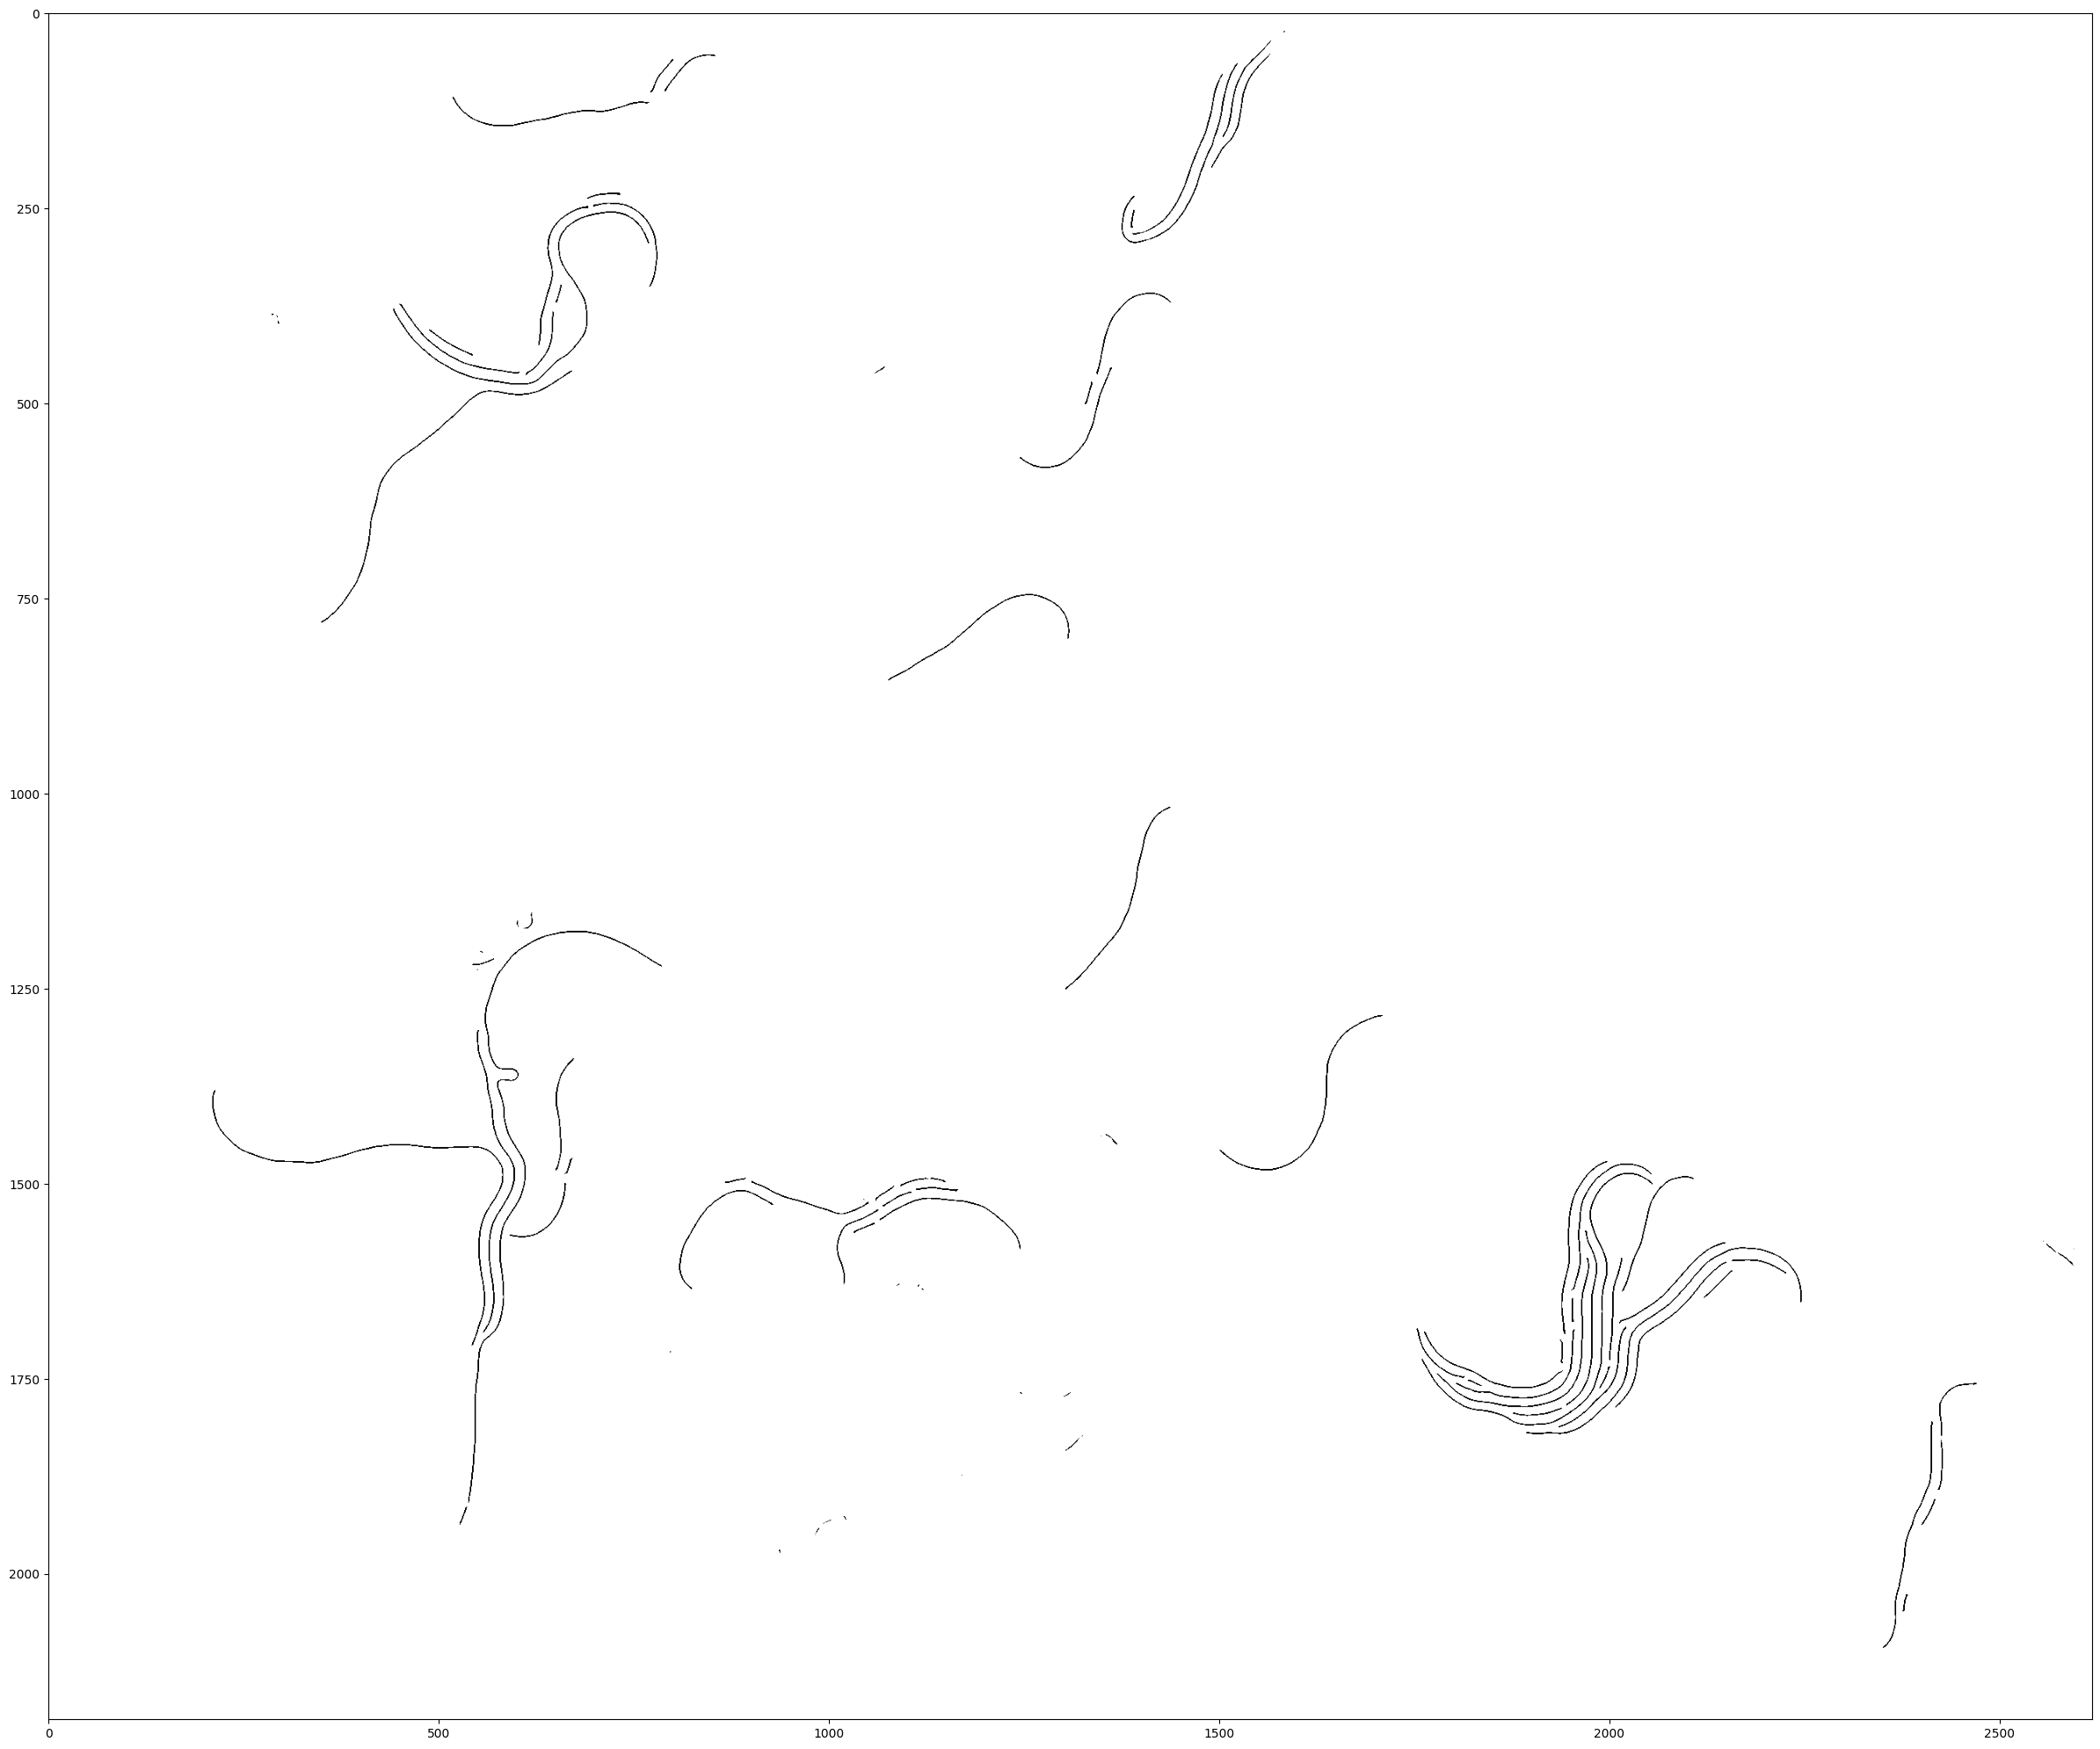

In [6]:
fig = plt.figure(figsize=(30, 30))
plt.gca().invert_yaxis()
image = plt.imshow((skeleton < -3), cmap='Greys')

In [13]:
from segger_tracker import SeggerTracker

In [7]:
def generate_imag(npy_path):
    dat = np.load(npy_path, allow_pickle=True).item()
    gradientsx = np.gradient(dat['flows'][-1][0])
    gradientsy = np.gradient(dat['flows'][-1][1])
    gradient_total = gradientsy[1] + gradientsx[0]
    regs_label = dat['masks']
    cell_num = np.max(regs_label)
    centers = SeggerTracker.find_skeleton_centers(cell_num, gradient_total, -3, regs_label)
    print(len(centers))
    all_ends = SeggerTracker.find_multi_ends(2, cell_num, centers, gradient_total,-3, regs_label)
    print(len(all_ends))
    print(all_ends)
    trans_array = np.zeros([len(regs_label[0]),len(regs_label),3])
    plt.figure(figsize=(25.63, 21.87))
    image = plt.imshow(gradient_total, cmap='Greys')

    plt.xlim(0,2560)
    plt.ylim(0,2160)

    plt.gca().invert_yaxis()

    for each in all_ends:
        [x,y] = SeggerTracker.extract_xy(each)
        plt.scatter(x, y, c='red', marker='o', s=10)
        [vx,vy] = SeggerTracker.calculate_local_slop(each, 10,gradient_total,regs_label, -3)
        plt.arrow(x, y, vx*5, vy*5, head_width = 5, width = 0.5, ec ='black')


    image_filename = npy_path.replace('_seg.npy', '.png')
    image_filename = image_filename.replace('xy0/phase', 'images')
    plt.show()

In [6]:
npy_file = "/Users/sherryyang/wigginsLab/data/0814/xy0/phase/211121_37C_10_1176_HU_timelapse002_prob211203_HU_t00022xy0c1_seg.npy"
generate_imag(npy_file)

68
0
1
0
[]


68
134
[5301565, 5500854, 10200772, 23501391, 28301389, 10800518, 23800690, 24800698, 24800691, 25301390, 37900442, 34900656, 46301344, 46000603, 38300646, 43800543, 57101245, 78100349, 47301336, 80201306, 101801437, 122200785, 145701501, 130400551, 148300650, 170700543, 148800661, 169301943, 148802054, 172501760, 149402108, 149800867, 150301092, 156700591, 152601050, 150301083, 150801112, 152700928, 151201105, 154601065, 153401063, 155101058, 156101969, 157602148, 160502594, 182001894, 159602016, 159902157, 174401779, 178702008, 161202157, 164701953, 168402021, 168701955, 174801814, 174001940, 170001937, 176201988, 175901836, 175702470, 179501877, 209402351, 182902425, 190502418, 204802377, 15901505, 175701804, 19801491, 10000791, 6000800, 6501523, 7901504, 11500769, 23200732, 35100770, 42600628, 27501389, 29500769, 37100650, 37101438, 37300450, 46300612, 40600488, 45501362, 46000670, 50101329, 85501076, 125001303, 190900538, 128501709, 169100557, 134000673, 138100213, 146800671, 1472

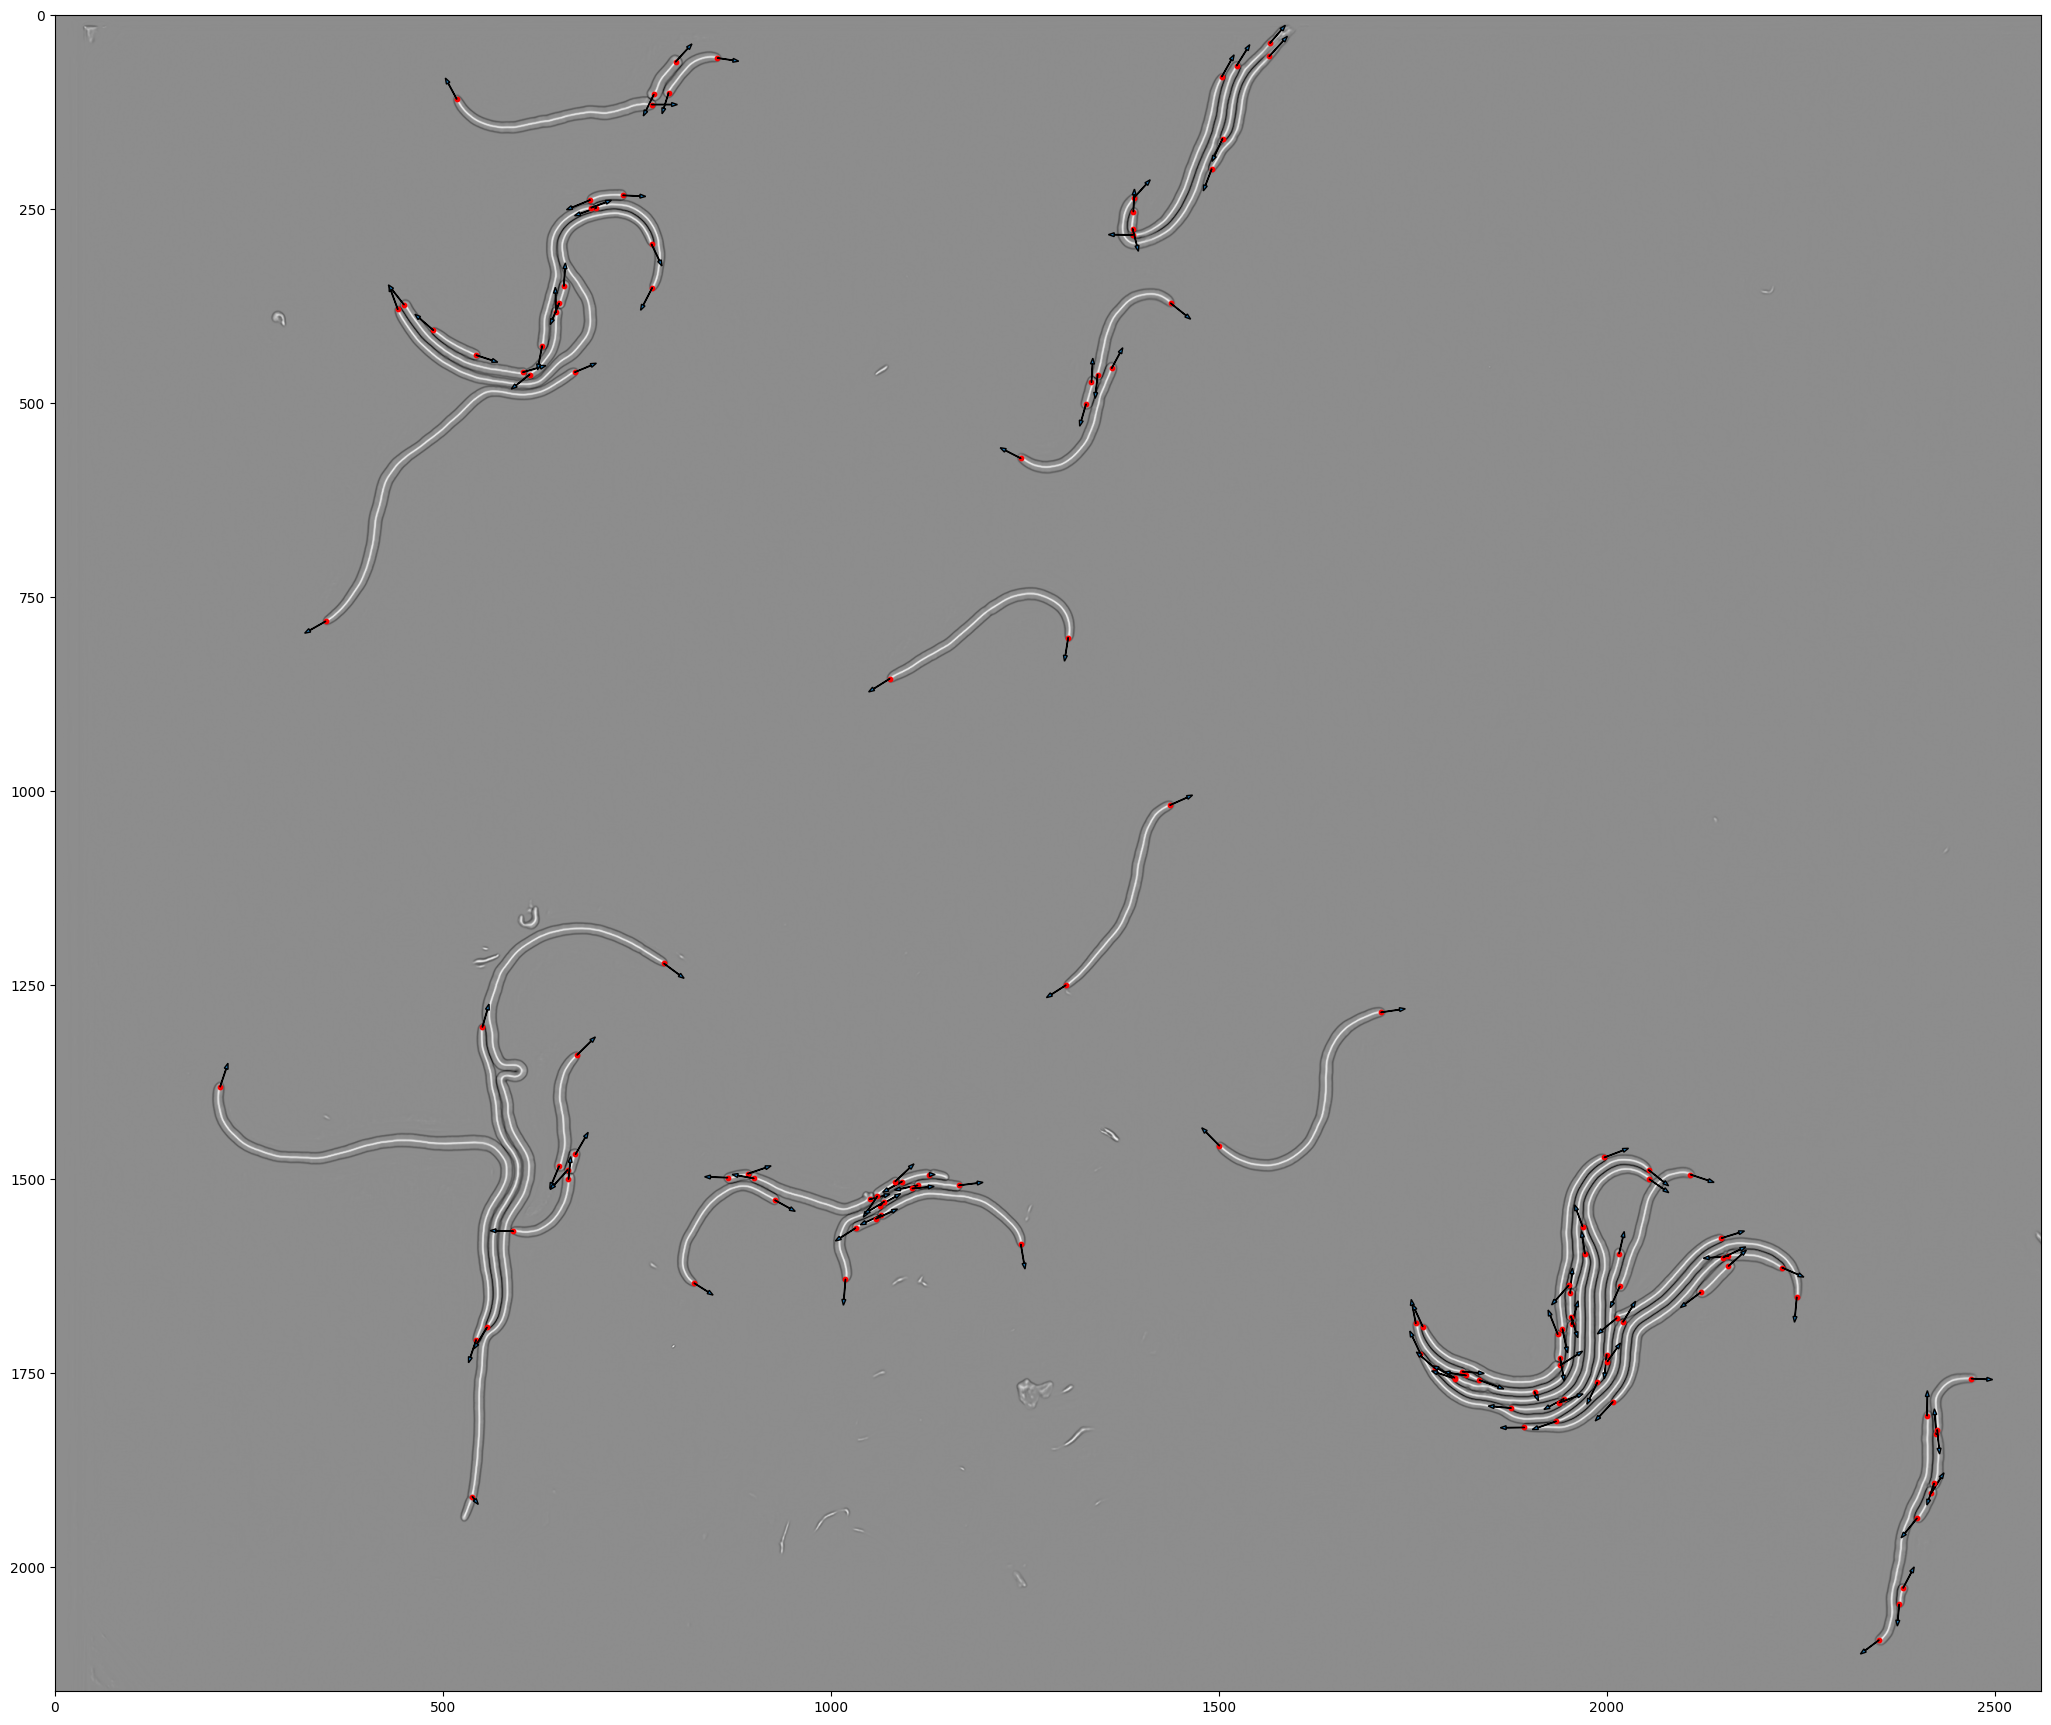

In [12]:
npy_path = "/Users/sherryyang/wigginsLab/data/0814/xy0/phase/211121_37C_10_1176_HU_timelapse002_prob211203_HU_t00022xy0c1_seg.npy"


plt.show()

In [5]:
from segger_tracker import SeggerTracker
len(SeggerTracker.flow_to_ends(centers, gradient_total, -1))

894

In [9]:
from segger_tracker import SeggerTracker
SeggerTracker.flow_to_ends(centers, gradient_total, -1)

[175601826,
 158902576,
 166201953,
 36000653,
 36000655,
 147700666,
 147700668,
 151101071,
 165902004,
 48701332,
 48701334,
 166402062,
 171601941,
 154400833,
 168101992,
 203702377,
 148500612,
 179701908,
 179701909,
 179701910,
 42600643,
 154101962,
 177502426,
 13500645,
 26501387,
 152101160,
 152101161,
 152101162,
 55900465,
 192002412,
 194902382,
 171501941,
 168001992,
 203602377,
 162802142,
 155501046,
 154001962,
 44200516,
 26401387,
 151401070,
 8401525,
 140501636,
 176601824,
 158001947,
 173701963,
 159802189,
 159802190,
 159802191,
 33100644,
 154700648,
 153901962,
 27300772,
 21101475,
 39101362,
 11801528,
 149500879,
 149500880,
 140401636,
 19301467,
 157901947,
 167801979,
 173601963,
 176501932,
 175301825,
 33000644,
 113501389,
 150500595,
 159202576,
 11701528,
 186502427,
 23100710,
 23100711,
 23100712,
 175902003,
 148700612,
 167701979,
 157801947,
 155502045,
 173501963,
 32900644,
 113401389,
 141700653,
 11601528,
 186402427,
 145100430,
 1451

In [126]:
def flow_to_ends(start_points, gradient_total, threshold):
    # Don't pollute original data
    start_points_copy = start_points.copy()
    gradient_total_copy = gradient_total.copy()
    masked_array = gradient_total_copy < threshold
    # Point set is the set flow go through 
    point_set = set(start_points_copy)
    end_point = []
    while point_set:
        new_set = set()
        for element in point_set:
            [xx,yy] = SeggerTracker.extract_xy(element)
            # DO waterfront
            waterfront_set = set([
                element - 1,
                element + 1,
                element - SeggerTracker.DIGIT_CONST + 1,
                element + SeggerTracker.DIGIT_CONST + 1,
                element + SeggerTracker.DIGIT_CONST - 1, 
                element - SeggerTracker.DIGIT_CONST - 1,
                element + SeggerTracker.DIGIT_CONST,
                element - SeggerTracker.DIGIT_CONST,
            ])
                
            flag = False
            for each in waterfront_set:
                [x,y] = SeggerTracker.extract_xy(each)
                if (x < 0) or (y < 0) or (y >= len(masked_array)) or (x >= len(masked_array[0])):
                    continue
                else:
                    if masked_array[y,x]:
                        new_set.add(each)
                        flag = True
            if flag is False:
                end_point.append(element)
            masked_array[yy,xx] = False

        # Mask the pixels out when the whole waterfront of pixels iterated, so won't self eated. 
        for each in new_set:
            [x,y] = SeggerTracker.extract_xy(each)
            masked_array[y,x] = False
            
        point_set = new_set

    return end_point

In [104]:
def flow_to_ends(start_points, gradient_total, threshold):
    # Don't pollute original data
    start_points_copy = start_points.copy()
    gradient_total_copy = gradient_total.copy()
    masked_array = gradient_total_copy < threshold
    # Point set is the set flow go through
    point_set = set(start_points_copy)
    end_point = []
    while point_set:
        newSet = set()
        for element in point_set:
            [xx,yy] = SeggerTracker.extract_xy(element)
            # DO waterfront
            waterfront_set = set([
                element - 1,
                element + 1,
                element - SeggerTracker.DIGIT_CONST + 1,
                element + SeggerTracker.DIGIT_CONST + 1,
                element + SeggerTracker.DIGIT_CONST - 1, 
                element - SeggerTracker.DIGIT_CONST - 1,
                element + SeggerTracker.DIGIT_CONST,
                element - SeggerTracker.DIGIT_CONST,
            ])
            flag = False
            for each in waterfront_set:
                [x,y] = SeggerTracker.extract_xy(each)
                if ((x < 0) or (y < 0) or (y >= len(masked_array)) or (x >= len(masked_array[0]))):
                    continue
                else:
                    if masked_array[y,x] is True :
                        newSet.add(each)
                        flag = True
            if flag is False:
                end_point.append(element)
            masked_array[yy,xx] = False

        # Mask the pixels out when the whole waterfront of pixels iterated, so won't self eated.
        for each in newSet:
            [x,y] = SeggerTracker.extract_xy(each)
            masked_array[y,x] = False

        point_set = newSet

    return end_point

In [127]:
len(flow_to_ends(centers, gradient_total, -1))

894

In [89]:
len(centers)

68

In [2]:
npy_path = "/Users/sherryyang/wigginsLab/data/0814/xy0/phase/211121_37C_10_1176_HU_timelapse002_prob211203_HU_t00022xy0c1_seg.npy"
dat = np.load(npy_path, allow_pickle=True).item()
regs_label = dat['masks']

In [49]:
mat_filename = "/Users/sherryyang/wigginsLab/data/0814/xy0/phase/211121_37C_10_1176_HU_timelapse002_prob211203_HU_t00022xy0c1_track.mat"

loaded_data = loadmat(mat_filename)
vector = loaded_data['vector']
skeleton = loaded_data['skeleton']

end_list = []

for x in range(len(vector)):
    for y in range(len(vector[x])):
        vector_field_dot = vector[x][y]
        if(vector_field_dot[2] != 0):      
            end_list.append(SeggerTracker.compress_xy(x,y))


pair_array = []


for i in range(len(end_list)):
    for j in range(i+1, len(end_list)):
        [x1, y1] = SeggerTracker.extract_xy(end_list[i])
        [x2, y2] = SeggerTracker.extract_xy(end_list[j])
        if(regs_label[y1,x1] == regs_label[y2,x2]):
            continue 
        vector_field_dot = vector[x1][y1]
        
        vx1, vy1 = vector_field_dot[0], vector_field_dot[1]
        vector_field_dot = vector[x2][y2]
        vx2, vy2 = vector_field_dot[0], vector_field_dot[1]
        new_vector = [vx1-vx2, vy1-vy2]
        distance_vector = [x2-x1,y2-y1]
        
        if (vx1 * vx2) + (vy1 * vy2)> 0:
            continue
            
        cost = 1/ ((x1-x2)**2 + (y1-y2)**2)**1.5 * (new_vector[0] * distance_vector[0] + new_vector[1] * distance_vector[1] )
        if cost > 0:
            pair_array.append([x1,y1,x2,y2,cost])
            

In [50]:
import pandas as pd
columns = ["x1", "y1", "x2", "y2", "cost"]
df = pd.DataFrame(pair_array, columns=columns)

In [51]:
df.sort_values(by=['cost'], ascending=False)

x1    y1    x2    y2          cost
1957  2151  1600  2155  1599  1.555591e+00
625    693   248   697   245  9.171182e-01
233    605   460   610   460  9.144709e-01
1899  2001  1728  2002  1733  9.039634e-01
1271  1084  1500  1089  1500  8.835896e-01
...    ...   ...   ...   ...           ...
1897  1998  1473  2427  1813  1.978173e-08
1712  1579    37  2155  1599  1.838371e-08
949    800    55  1817  1753  1.130390e-08
316    628   429  1439  1018  8.117498e-09
1016   856    55  1987  1763  7.455292e-09

[1985 rows x 5 columns]

In [25]:
min_indices = df.groupby(['x1','y1']).first()

In [62]:
min_indices.reset_index(inplace=True)

In [63]:
min_indices.sort_values(by=['cost'])

x1    y1    x2    y2       cost
75  2151  1600  2155  1599 -39.508689
57  1952  1681  1956  1684 -34.120205
52  1941  1788  1943  1783 -34.048996
11   693   248   697   245 -33.957890
63  2001  1728  2002  1733 -31.492823
..   ...   ...   ...   ...        ...
71  2056  1501  2155  1599  -1.131067
70  2055  1488  2155  1599  -1.123837
78  2378  2050  2416  1899  -1.074380
0    487   406   605   460  -1.038036
60  1970  1560  2001  1728  -1.024591

[83 rows x 5 columns]

In [64]:
min_indices = min_indices.groupby(['x2','y2']).first()

In [65]:
min_indices.reset_index(inplace=True)

In [66]:
min_indices.sort_values(by=['cost'], ascending = False)

x2    y2    x1    y1       cost
44  2001  1728  1970  1560  -1.024591
0    605   460   487   406  -1.038036
56  2416  1899  2378  2050  -1.074380
51  2155  1599  2055  1488  -1.123837
10   769   296   659   345  -1.212100
55  2415  1802  2403  1940  -1.239972
42  1956  1684  1943  1783  -1.252487
15  1030  1561   930  1526  -1.275135
43  1987  1763  1955  1644  -1.476678
49  2118  1647  2022  1683  -1.532787
41  1955  1644  1943  1734  -1.546999
11   774   108   772   115  -1.567273
1    610   460   545   438  -1.574320
57  2418  1892  2415  1802  -1.589545
53  2381  2025  2348  2094  -1.601763
31  1505    78  1491   200  -1.613738
37  1941  1741  1876  1793  -1.662072
54  2403  1940  2381  2025  -1.702818
30  1491   200  1391   233  -1.808009
33  1524    63  1506   160  -1.932522
34  1816  1748  1760  1724  -2.000701
50  2149  1576  2118  1647  -2.195339
14   930  1526   864  1498  -2.211006
28  1363   451  1327   505  -2.385506
48  2022  1683  1987  1763  -2.417865
32  1506   160  1505    78  -2.476309
6    672   459   610   460  -2.590964
12   800    55   792   104  -2.833481
2    645   379   628   429  -2.863554
47  2019  1642  2014  1592  -2.971591
36  1876  1793  1837  1759  -3.190663
29  1391   233  1388   278  -3.500487
46  2009  1787  2002  1733  -3.580982
16  1054  1526  1030  1561  -3.707428
9    734   232   697   245  -4.513877
26  1150  1499  1110  1506  -4.728310
38  1943  1734  1941  1741  -4.850905
18  1061  1552  1056  1518  -4.868284
22  1084  1500  1066  1528  -4.869961
24  1107  1513  1089  1500  -7.011950
52  2162  1613  2155  1599  -9.645503
7    693   248   688   236 -13.047424
4    659  1495   653  1487 -14.180578
20  1065  1535  1062  1546 -14.488253
17  1056  1518  1054  1526 -17.758697
5    667  1491   659  1495 -18.339398
27  1345   468  1337   468 -20.275485
40  1945  1696  1937  1698 -21.608904
25  1110  1506  1107  1513 -21.641594
3    652   376   645   379 -23.013150
21  1066  1528  1065  1535 -23.396760
13   897  1500   895  1493 -24.372243
35  1817  1753  1816  1748 -25.445078
23  1089  1500  1084  1500 -25.918285
19  1062  1546  1061  1552 -27.932020
45  2002  1733  2001  1728 -31.492823
8    697   245   693   248 -33.957890
39  1943  1783  1941  1788 -34.048996

In [67]:
max_color_value = min_indices['cost'].min()

In [71]:
len(min_indices)

58

In [57]:
min_indices = min_indices[min_indices['cost'] < -4]

In [58]:
len(min_indices)

24

In [52]:
table = df.sort_values(by=['cost'], ascending=False)

In [53]:
table['flag'] = True

In [54]:
point_set = set()
for index, row in table.iterrows():
    if (SeggerTracker.compress_xy(row['x1'],row['y1']) in point_set) or (SeggerTracker.compress_xy(row['x2'],row['y2']) in point_set):
        table.at[index, 'flag'] = False
        continue
    point_set.add(SeggerTracker.compress_xy(row['x1'],row['y1']))
    point_set.add(SeggerTracker.compress_xy(row['x2'],row['y2']))

In [55]:
table = table[table['flag'] == True]

In [56]:
max_color_value = table['cost'].max()

In [57]:
table

x1    y1    x2    y2          cost  flag
1957  2151  1600  2155  1599  1.555591e+00  True
625    693   248   697   245  9.171182e-01  True
233    605   460   610   460  9.144709e-01  True
1899  2001  1728  2002  1733  9.039634e-01  True
1271  1084  1500  1089  1500  8.835896e-01  True
1831  1941  1788  1943  1783  6.739250e-01  True
1868  1952  1681  1956  1684  5.197136e-01  True
1980  2416  1899  2418  1892  4.414082e-01  True
1812  1941  1741  1943  1734  3.756289e-01  True
1750  1816  1748  1817  1753  3.458090e-01  True
1174  1061  1552  1062  1546  3.384061e-01  True
1860  1951  1639  1955  1644  3.229903e-01  True
782    772   115   774   108  2.913068e-01  True
1216  1065  1535  1066  1528  2.458295e-01  True
397    653  1487   659  1495  2.031708e-01  True
1311  1107  1513  1110  1506  1.998026e-01  True
342    645   379   652   376  1.850770e-01  True
1129  1054  1526  1056  1518  1.717012e-01  True
1025   895  1493   897  1500  1.080520e-01  True
1513  1337   468  1345   468  3.675330e-02  True
1921  2019  1642  2022  1683  1.421964e-02  True
1770  1837  1759  1876  1793  8.794789e-03  True
1802  1937  1698  1945  1696  6.262906e-03  True
1974  2381  2025  2403  1940  3.177514e-03  True
1792  1908  1773  1934  1811  2.760738e-03  True
1073   930  1526  1030  1561  2.083576e-03  True
1597  1391   233  1491   200  1.768526e-03  True
420    659   345   688   236  1.506878e-03  True
1917  2014  1592  2056  1501  1.292306e-03  True
491    672   459   771   353  1.206657e-03  True
1601  1392   251  1506   160  1.094472e-03  True
664    734   232   792   104  9.000161e-04  True
1549  1363   451  1388   278  7.991072e-04  True
1889  1973  1595  2055  1488  5.227611e-04  True
531    673  1465   864  1498  4.734131e-04  True
1420  1243   571  1327   505  3.706146e-04  True
1971  2246  1654  2415  1802  3.548129e-04  True
64     537  1911   543  1709  3.318567e-04  True
1969  2227  1614  2554  1573  2.100523e-04  True
1388  1167  1509  1302  1251  2.029528e-04  True
1357  1150  1499  1499  1457  1.935150e-04  True
1456  1306   805  1439  1018  1.653528e-04  True
1727  1711  1286  1970  1560  1.378013e-04  True
1742  1760  1724  2012  1680  1.224438e-04  True
998    856    55  1388   284  7.056543e-05  True
1428  1246  1586  1778  1743  6.892825e-05  True
582    674  1339  1075   854  6.610316e-05  True
1740  1753  1684  2118  1647  6.468249e-05  True
0      214  1378   348   781  6.217871e-05  True
186    551  1302   628   429  3.498823e-05  True
1118  1019  1631  1803  1757  2.588011e-05  True
968    825  1636  1804  1755  2.461618e-05  True
879    787  1222  1763  1689  2.108354e-05  True
227    589  1566   667  1491  1.246239e-05  True
732    769   296  1892  1820  6.156143e-06  True
1948  2110  1494  2348  2094  4.365232e-06  True
174    545   438  2009  1787  2.630814e-06  True
1897  1998  1473  2427  1813  1.978173e-08  True

/var/folders/wp/13gpg6394h94dzpntygyldd00000gn/T/ipykernel_11978/1649143393.py:20: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  colorbar = plt.colorbar(sm, orientation='vertical', shrink=0.8)


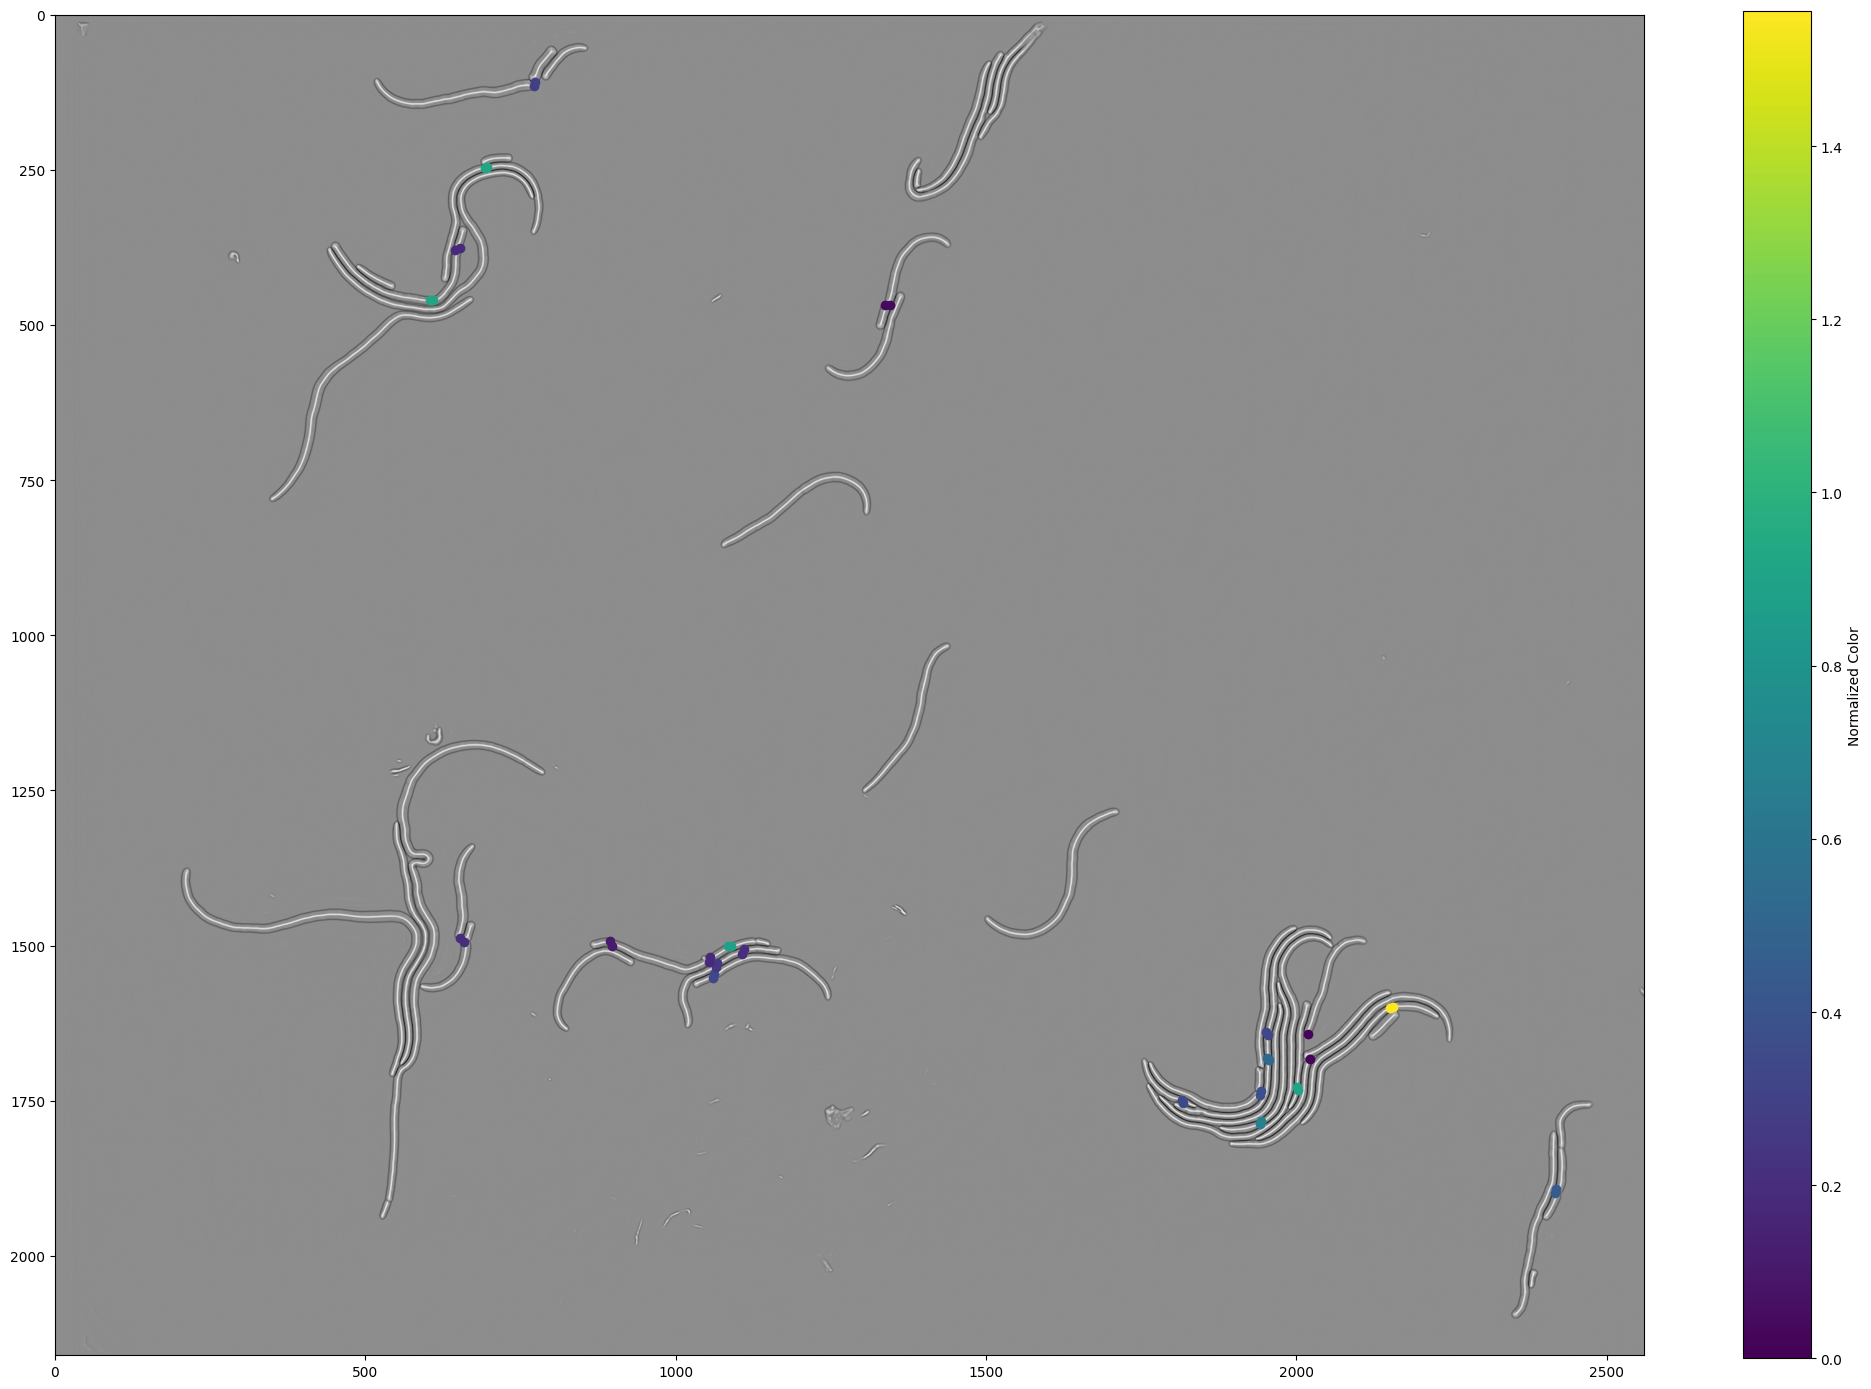

In [58]:
plt.figure(figsize=(25.63, 21.87))
image = plt.imshow(skeleton, cmap='Greys')

plt.xlim(0,2560)
plt.ylim(0,2160)
    
plt.gca().invert_yaxis()
colormap = plt.colormaps.get_cmap('viridis')


for index, row in table[table['cost'] > 0.01].iterrows():
    normalized_color = row['cost']/ max_color_value
    color = colormap(normalized_color)
    plt.scatter(row['x1'], row['y1'], color=color, marker='o')
    plt.scatter(row['x2'], row['y2'], color=color, marker='o')  
    
sm = plt.cm.ScalarMappable(cmap=colormap, norm=plt.Normalize(vmin=0, vmax=max_color_value))
sm._A = []  # Fake up the array of the scalar mappable

colorbar = plt.colorbar(sm, orientation='vertical', shrink=0.8)
colorbar.set_label('Normalized Color')

plt.show() 

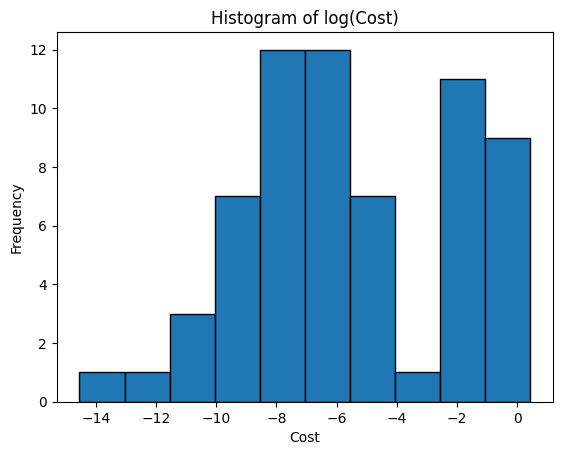

In [45]:
import matplotlib.pyplot as plt
import pandas as pd

plt.hist(np.log(table['cost']), bins=10, edgecolor='black')  # Adjust 'bins' as needed
plt.xlabel('Cost')
plt.ylabel('Frequency')
plt.title('Histogram of log(Cost)')
plt.show()

In [ ]:
plt.figure(figsize=(25.63, 21.87))
image = plt.imshow(skeleton, cmap='Greys')

plt.xlim(0,2560)
plt.ylim(0,2160)
    
plt.gca().invert_yaxis()
colormap = plt.colormaps.get_cmap('viridis')

In [ ]:
plt.scatter(row['x1'], row['y1'], c=color, marker='o', s=10)
    plt.scatter(row['x2'], row['y2'], c=color, marker='o', s=10)
      print(index[0], index[1],row['x2'], row['y2'], color)          

In [2]:
array_of_arrays = [[1, 2, 3], [2, 3, 4], [5, 6, 7], [1, 2, 3]]

distinct_sublists = []
seen_sublists = set()

for sublist in array_of_arrays:
    sublist_tuple = tuple(sublist)  # Convert sublist to tuple to use it in the set
    if sublist_tuple not in seen_sublists:
        seen_sublists.add(sublist_tuple)
        distinct_sublists.append(sublist)

print("Distinct Sublists:", distinct_sublists)

Distinct Sublists: [[1, 2, 3], [2, 3, 4], [5, 6, 7]]


In [9]:
set = set([[1, 2, 3], [2, 3, 4], [5, 6, 7], [1, 2, 2], [1, 2, 3]])

TypeError: unhashable type: 'list'

In [3]:
my_tuple = (1, 2, 3,3,4,5)

In [7]:
my_tuple

([1, 2, 3], [2, 3, 4], [5, 6, 7], [1, 2, 2], [1, 2, 3])